Завантажена база даних Iris:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

Дані після перемішування:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                4.4               3.2                1.3               0.2   
1                4.6               3.6                1.0               0.2   
2                5.5               2.4                3.8               1.1   
3                4.3               3.0                1.1               0.1   
4                5.2               3.4                1.4               0.2   

   label  
0 

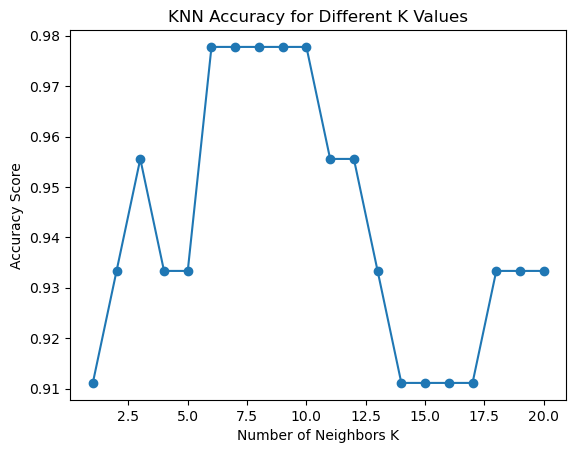

In [5]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# 1. Завантажити базу параметрів квітів iris dataset
iris = load_iris()
X, y = iris.data, iris.target
feature_names = iris.feature_names
print("Завантажена база даних Iris:")
print(pd.DataFrame(X, columns=feature_names).head())

# 2. Перемішати записи у завантаженій базі
df_iris = pd.DataFrame(X, columns=feature_names)
df_iris['label'] = y
df_iris = df_iris.sample(frac=1, random_state=2021).reset_index(drop=True)
print("\nДані після перемішування:")
print(df_iris.head())

# 3. Нормалізувати параметри квітів ірису
scaler = StandardScaler()
X_normalized = scaler.fit_transform(df_iris[feature_names])
print("\nНормалізовані дані:")
print(pd.DataFrame(X_normalized, columns=feature_names).head())

# 4. Розділити існуючі записи на навчальну і тестові вибірки
X_train, X_test, y_train, y_test = train_test_split(X_normalized, df_iris['label'], test_size=0.3, random_state=2021)
print("\nНавчальна вибірка (перші 5 записів):")
print(pd.DataFrame(X_train, columns=feature_names).head())
print("\nТестова вибірка (перші 5 записів):")
print(pd.DataFrame(X_test, columns=feature_names).head())

# 5. Навчити KNN-класифікатор з різними значеннями K
k_values = range(1, 21)
scores = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))

# 6. Вибрати величину K для найкращих показників якості класифікацій у тестовій вибірці
k_best = k_values[np.argmax(scores)]
score_best = max(scores)
print('\nНайкраще значення k = {} , точність = {:.2f}'.format(k_best, score_best))

# Візуалізація точності при різних значеннях K
plt.figure()
plt.plot(k_values, scores, marker='o')
plt.xlabel('Number of Neighbors K')
plt.ylabel('Accuracy Score')
plt.title('KNN Accuracy for Different K Values')
plt.show()
